<a href="https://colab.research.google.com/github/stanislawWojtas/Uczenie-Maszynowe/blob/main/lab02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Przygotowanie danych

In [31]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

In [32]:
#zobaczenie labeli
mnist.target.head()

,class
0,5
1,0
2,4
3,1
4,9


In [33]:
#Jak wyglądają dane
mnist['target']
mnist.data.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
#jaki jest typ danych
print("typ labeli to: ", type(mnist.target.iloc[0]))
mnist.data.dtypes

typ labeli to:  <class 'str'>


,0
pixel1,int64
pixel2,int64
pixel3,int64
pixel4,int64
pixel5,int64
...,...
pixel780,int64
pixel781,int64
pixel782,int64
pixel783,int64


Zobaczymy sobie jak wygląda przykładowy element ze zbioru mnist:

In [35]:
print((np.array(mnist.data.loc[2115]).reshape(28,28) > 0).astype(int))
print("Powyższa liczba to: ", mnist.target.loc[2115])

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 

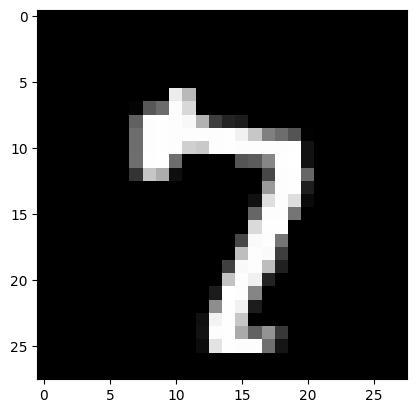

In [36]:
# w formie obrazka
from matplotlib import pyplot as plt

pixels = np.array(mnist.data.loc[2115]).reshape(28,28)
plt.imshow(pixels, cmap='grey')
plt.show()

### Zbiór uczący i testowy

In [37]:
# dodanie label do jednego dataframe
df = mnist.data
df['target'] = mnist.target
df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [38]:
# Stworzenie posortowanego zbioru
df_sorted = df.sort_values(by='target')
df_sorted

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,target
34999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56424,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56419,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16705,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56415,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13687,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
42651,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
58914,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
13678,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [39]:
# drop to parament, który mówi czy zachować kolumnę ze starymi indexami
X = df_sorted.drop('target', axis=1).reset_index(drop=True)
y = df_sorted['target'].reset_index(drop=True)

In [40]:
# Podział danych na zbiór uczący i treningowy
X_train, X_test = X[:56000], X[56000:]
y_train, y_test = y[:56000], y[56000:]
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(56000, 784) (56000,)
(14000, 784) (14000,)


In [41]:
# Sprawdzenie klas
print("y_train: ", y_train.unique())
print("y_test: ", y_test.unique())

y_train:  ['0', '1', '2', '3', '4', '5', '6', '7']
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']
y_test:  ['7', '8', '9']
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


Widzimy, że podział nie jest poprawny bo zbiór treningowy zawiera tylko labely od 0 do 7. W takim wypadku model nie nauczy się rozpoznawać cyfry 7, 8 i 9. Lepszą opcją jest skorzystanie z funkcji *train_test_split()*. Można zrobić taki sam podział jak wyżej za pomocą tej funkcji ustawiając parametr *shuffle=False*.

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)
print("y_train: ", y_train.unique())
print("y_test: ", y_test.unique())

y_train:  ['0', '1', '2', '3', '4', '5', '6', '7']
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']
y_test:  ['7', '8', '9']
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


In [43]:
# Prawidłowy podział - zarówno y_train jak y_test mają po 10 klas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

print("y_train: ", y_train.unique())
print("y_test: ", y_test.unique())

y_train:  ['6', '9', '1', '4', '0', '2', '8', '3', '5', '7']
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']
y_test:  ['6', '5', '4', '1', '3', '0', '8', '2', '9', '7']
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


### Uczenie, jedna klasa

In [44]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

y_train_0 = (y_train == '0')
y_test_0 = (y_test == '0')

sgd_binary = SGDClassifier(random_state=42)
sgd_binary.fit(X_train, y_train_0)

train_acc_0 = accuracy_score(y_train_0, sgd_binary.predict(X_train))
test_acc_0 = accuracy_score(y_test_0, sgd_binary.predict(X_test))
print("Dokładność na zbiorze uczącym wynosi: ", train_acc_0)
print("Dokładność na zbiorze testowym wynosi: ", test_acc_0)

Dokładność na zbiorze uczącym wynosi:  0.9832142857142857
Dokładność na zbiorze testowym wynosi:  0.9818571428571429


In [45]:
import pickle
acc_list = [float(train_acc_0), float(test_acc_0)]

# w - tryb write, b - tryb binarny (konieczny do plików pickle), metoda dump serializuje obiekt i zapisuje do pliku pickle
with open ("sgd_acc.pkl", "wb") as f:
  pickle.dump(acc_list, f)

In [46]:
# 3 punktowa walidacja krzyżowa
from sklearn.model_selection import cross_val_score

score = cross_val_score(sgd_binary, X_train, y_train_0, cv=3, scoring="accuracy")
print("Dokładność na zbiorze uczącym wynosi: ", score)
score_array = np.array(score)

#zapisanie do pliku
with open ("sgd_cva.pkl", "wb") as f:
  pickle.dump(score_array, f)

Dokładność na zbiorze uczącym wynosi:  [0.98842878 0.98805378 0.98799957]


### Uczenie, wiele klas

In [47]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

sgd = SGDClassifier(random_state=42)
sgd.fit(X_train, y_train)

train_acc = accuracy_score(y_train, sgd.predict(X_train))
test_acc = accuracy_score(y_test, sgd.predict(X_test))
print("Dokładność na zbiorze uczącym wynosi: ", train_acc)
print("Dokładność na zbiorze testowym wynosi: ", test_acc)

Dokładność na zbiorze uczącym wynosi:  0.8802678571428572
Dokładność na zbiorze testowym wynosi:  0.8687857142857143


In [48]:
from sklearn.metrics import confusion_matrix

# tworze macierz błędów przedstawia liczbe poprawnych i błędnych predykcji dla każdego labela
conf_matrix = confusion_matrix(y_test, sgd.predict(X_test))
conf_matrix = np.array(conf_matrix)
print(conf_matrix)

# zapisanie do pliku
with open("sgd_cmx.pkl", "wb") as f:
  pickle.dump(conf_matrix, f)

[[1318    0    1    0    1    7   10    0   28    0]
 [   1 1370   12    4    2    4    6    3  180   10]
 [  18    8 1111   20   18    9   36    8  152    9]
 [   4    4   29 1066   11  119    3    6  130   22]
 [   4    0    1    1 1230    8   17    1   49   55]
 [  15    1    4   34   23 1065   30    3  119   16]
 [   5    1    7    0    8   23 1323    0   32    0]
 [   6    0   13    1   20    4    0 1241   68   90]
 [   9    5    7   11    7   30    3    1 1284   13]
 [   5    0    3    7   41   15    0   32  114 1155]]
